In [2]:
!pip install tensorflow

  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30702 sha256=07cbecf7cc15b0297718ff40c80efe026eca41516c365c8d1799e1a1fe178671
  Stored in directory: c:\users\mama8\appdata\local\pip\cache\wheels\f1\60\77\22b9b5887bd47801796a856f47650d9789c74dc3161a26d608
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=647a99195c2fa3fe3d0408cde0e22a3876381f2c91a5be137f132dc4ad665c1b
  Stored in directory: c:\users\mama8\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built clang termcolor
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.1
    Uninstalling numpy-1.20.1:
      Successfully uninstalled numpy-1.20.1
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0


In [3]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [46]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELs = 3
EPOCHS = 20

In [8]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "C:\\Users\\mama8\\Desktop\\สมัครงาน\\Data science project\\Plant_village\\PlantVillage",
    shuffle = True, #ให้สุ่มเลือกมา
    image_size = (IMAGE_SIZE,IMAGE_SIZE), #ดูจากใน details ของ properties รูปภาพ
    batch_size = BATCH_SIZE

)

Found 2152 files belonging to 3 classes.


In [9]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [10]:
len(dataset) # 68 เพราะว่าbatchนึงมี 32 รูป ทำให้ dataset มีทั้งหมด 68 batch (2152/32~68)

68

In [11]:
for image_batch,label_batch in dataset.take(1): #เอามา batch เดียว
    print(image_batch.shape)
    print(label_batch.numpy())
#(32, 256, 256, 3) 32 คือ จำนวนภาพใน batchเดียว 256,256 คือ sizeของภาพ 3 คือ RGB 
# บรรทัดล่างคือ label ของรูปทั้ง 32 รูป ใน batchนี้

(32, 256, 256, 3)
[1 0 1 0 1 0 0 1 1 1 1 1 0 2 1 0 0 2 0 0 0 1 0 0 0 0 1 0 0 1 1 0]


In [12]:
for image_batch,label_batch in dataset.take(1): #เอามา batch เดียว
    print(image_batch[0]) # tensor

tf.Tensor(
[[[126. 118. 139.]
  [125. 118. 136.]
  [107. 103. 117.]
  ...
  [163. 165. 178.]
  [163. 165. 178.]
  [169. 171. 184.]]

 [[102.  94. 115.]
  [125. 118. 136.]
  [132. 128. 142.]
  ...
  [162. 164. 177.]
  [164. 166. 179.]
  [170. 172. 185.]]

 [[ 96.  89. 107.]
  [116. 109. 125.]
  [124. 120. 134.]
  ...
  [165. 167. 180.]
  [168. 170. 183.]
  [172. 174. 187.]]

 ...

 [[107. 103. 118.]
  [118. 114. 129.]
  [124. 120. 135.]
  ...
  [189. 191. 204.]
  [134. 136. 149.]
  [166. 168. 181.]]

 [[110. 106. 121.]
  [123. 119. 134.]
  [129. 125. 140.]
  ...
  [183. 185. 198.]
  [148. 150. 163.]
  [149. 151. 164.]]

 [[111. 107. 122.]
  [123. 119. 134.]
  [127. 123. 138.]
  ...
  [170. 172. 185.]
  [157. 159. 172.]
  [180. 182. 195.]]], shape=(256, 256, 3), dtype=float32)


In [13]:
for image_batch,label_batch in dataset.take(1): #เอามา batch เดียว
    print(image_batch[0].numpy()) #convert to numpy array (3d array) ตัวเลขจะเริ่มตั้งแต่ 0-255

[[[117.  99.  99.]
  [164. 146. 146.]
  [141. 123. 123.]
  ...
  [194. 184. 183.]
  [185. 175. 174.]
  [174. 164. 163.]]

 [[181. 163. 163.]
  [151. 133. 133.]
  [143. 125. 125.]
  ...
  [194. 184. 183.]
  [188. 178. 177.]
  [179. 169. 168.]]

 [[112.  94.  94.]
  [121. 103. 103.]
  [168. 150. 150.]
  ...
  [193. 183. 182.]
  [189. 179. 178.]
  [184. 174. 173.]]

 ...

 [[109.  94.  99.]
  [148. 133. 138.]
  [134. 119. 124.]
  ...
  [173. 163. 171.]
  [174. 164. 172.]
  [176. 166. 174.]]

 [[103.  88.  93.]
  [143. 128. 133.]
  [153. 138. 143.]
  ...
  [169. 159. 167.]
  [167. 157. 165.]
  [168. 158. 166.]]

 [[140. 125. 130.]
  [133. 118. 123.]
  [111.  96. 101.]
  ...
  [153. 143. 151.]
  [165. 155. 163.]
  [178. 168. 176.]]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


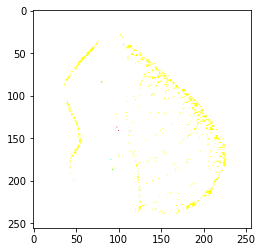

In [14]:
for image_batch,label_batch in dataset.take(1): #เอามา batch เดียว
    plt.imshow(image_batch[0].numpy()) # expect 3d array

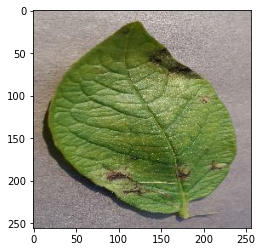

In [15]:
for image_batch,label_batch in dataset.take(1): #เอามา batch เดียว
    plt.imshow(image_batch[0].numpy().astype("uint8")) # convert to int ตอนแรกเป็น float

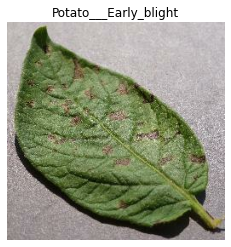

In [18]:
for image_batch,label_batch in dataset.take(1): #เอามา batch เดียว
    plt.imshow(image_batch[0].numpy().astype("uint8")) 
    plt.title(class_names[label_batch[0]])
    plt.axis("off") # เอาเลขรอบๆออก

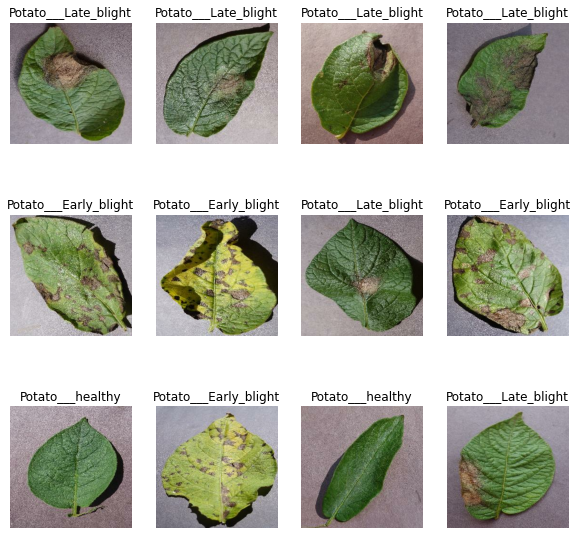

In [20]:
plt.figure(figsize = (10,10))
for image_batch,label_batch in dataset.take(1): #เอามา batch เดียว
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8")) 
        plt.title(class_names[label_batch[i]])
        plt.axis("off") # เอาเลขรอบๆออก

80 %  ==> training set  
20 %  ==> 10% validation set, 10% test set

In [22]:
train_size = 0.8
print(len(dataset)*train_size) #54.400000000000006

54.400000000000006


In [23]:
train_ds = dataset.take(54) # ไม่ใช้ train_test_split แต่ใช้ dataset.take(n) ซึ่งหมายความว่า เอาแค่ n ตัวแรก
len(train_ds)

54

In [25]:
test_ds = dataset.skip(54) # ถัดไป 54 ตัว เหมือน list[54:]
len(test_ds)

14

In [26]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [27]:
val_ds = test_ds.take(6)
test_ds = test_ds.skip(6)

In [28]:
def get_dataset_partition(ds,train_split=0.8,val_split = 0.1,shuffle=True,shuffle_size = 10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=12)
        
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    
    train_ds = ds.take(train_size).take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds

In [29]:
train_ds,val_ds,test_ds = get_dataset_partition(dataset)

In [30]:
print(len(train_ds))
print(len(val_ds))
print(len(test_ds))

54
6
8


In [32]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

cache : read image and keep that image to memory  
prefatch : if use both CPU and GPU if GPU is busy training prepatch will load the next set of batch from disk .. improve performance !  
buffer_size = tf.data.AUTOTUNE : let tensorflow determine how many batches to load

In [34]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE), # resize image
    layers.experimental.preprocessing.Rescaling(1.0/255) # หาร ด้วย 255 เพื่อให้ได้เลข 0-1จาก numpy array
]) # create resize_and_rescale layer for preprocessing

In [35]:
# data augmentation
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2) 
]) # create data_augmentation layer for preprocessing

In [42]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELs)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, #layer
                  (3,3), #filter size
                  activation = 'relu',
                  input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(n_classes,activation = 'softmax') # softmax normalize prob of your classes
    
])

model.build(input_shape = input_shape)

In [43]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    multiple                  0         
_________________________________________________________________
sequential_2 (Sequential)    (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d_19 (Conv2D)           (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_21 (Conv2D)           (32, 60, 60, 64)         

In [44]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [47]:
history = model.fit(train_ds,
          epochs = EPOCHS,
          batch_size = BATCH_SIZE,
          verbose = 1,
         validation_data = val_ds)

Epoch 1/20
54/54 [==============================] - 137s 3s/step - loss: 0.5859 - accuracy: 0.7338 - val_loss: 0.6050 - val_accuracy: 0.7083
Epoch 2/20
54/54 [==============================] - 145s 3s/step - loss: 0.4063 - accuracy: 0.8356 - val_loss: 0.3284 - val_accuracy: 0.8698
Epoch 3/20
54/54 [==============================] - 137s 3s/step - loss: 0.3216 - accuracy: 0.8750 - val_loss: 0.2998 - val_accuracy: 0.8698
Epoch 4/20
54/54 [==============================] - 139s 3s/step - loss: 0.2633 - accuracy: 0.9016 - val_loss: 0.2571 - val_accuracy: 0.8958
Epoch 5/20
54/54 [==============================] - 136s 3s/step - loss: 0.2083 - accuracy: 0.9178 - val_loss: 0.1784 - val_accuracy: 0.9271
Epoch 6/20
54/54 [==============================] - 139s 3s/step - loss: 0.2344 - accuracy: 0.9120 - val_loss: 0.2109 - val_accuracy: 0.9115
Epoch 7/20
54/54 [==============================] - 134s 2s/step - loss: 0.1901 - accuracy: 0.9271 - val_loss: 0.1878 - val_accuracy: 0.9219
Epoch 8/20
54

In [48]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 37s 470ms/step - loss: 0.1175 - accuracy: 0.9648


In [49]:
scores

[0.11745759844779968, 0.96484375]

In [50]:
history

In [51]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 54}

In [52]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [53]:
history.history['accuracy']

[0.7337962985038757,
 0.8356481194496155,
 0.875,
 0.9016203880310059,
 0.9178240895271301,
 0.9120370149612427,
 0.9270833134651184,
 0.9328703880310059,
 0.9496527910232544,
 0.9479166865348816,
 0.9276620149612427,
 0.9409722089767456,
 0.9473379850387573,
 0.9542824029922485,
 0.9415509104728699,
 0.9542824029922485,
 0.9629629850387573,
 0.9652777910232544,
 0.96875,
 0.9716435074806213]

In [54]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

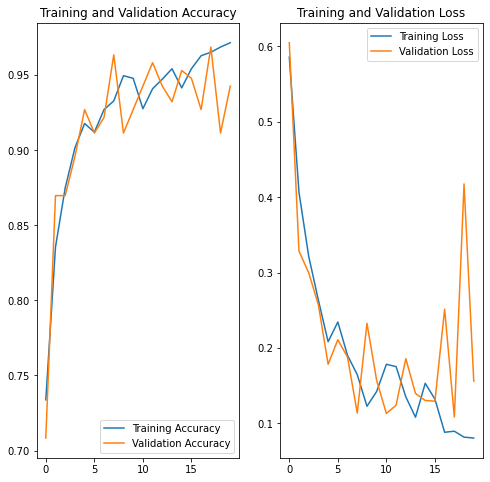

In [55]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Run prediction on a sample image

first image to predict
actual label: Potato___Late_blight
predicted label: Potato___Late_blight


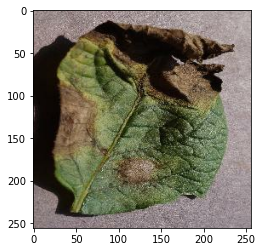

In [56]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [57]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

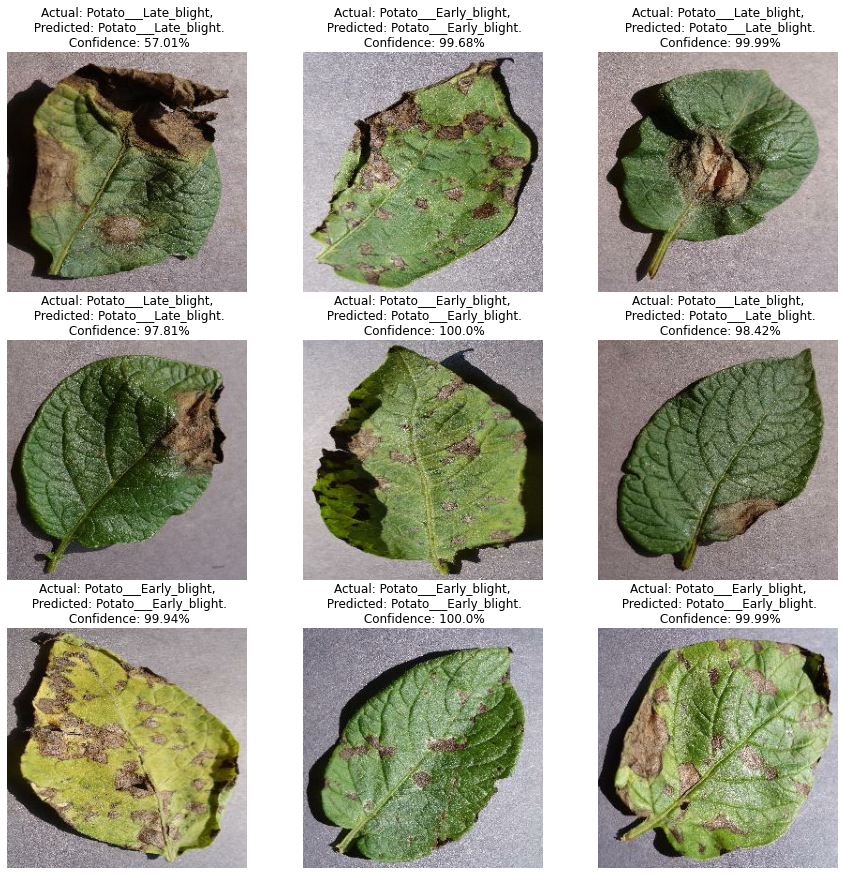

In [58]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [59]:
import os
model_version=max([int(i) for i in os.listdir("C:\\Users\\mama8\\Desktop\\สมัครงาน\\Data science project\\Plant_village\\models") + [0]])+1
model.save("C:\\Users\\mama8\\Desktop\\สมัครงาน\\Data science project\\Plant_village\\models\\{model_version}")

INFO:tensorflow:Assets written to: C:\Users\mama8\Desktop\สมัครงาน\Data science project\Plant_village\models\{model_version}\assets


In [60]:
model.save("../potatoes.h5")